In [1]:
import seaborn as sns
import pandas as pd
import plotly as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Write functions to geneare plots 

def generate_sns_box_plot(df, x_column_name, y_column_name,
                      title="", x_axis_label=None, y_axis_label=None,
                      write_path="", filename="box_plot",
                      min_y =None, max_y= None, x_dim = 45, y_dim = 7):


    max_y, min_y = _get_min_max_y(df, y_column_name, max_y, min_y)

    a4_dims = (x_dim, y_dim)
    fig, ax = plt.subplots(figsize=a4_dims)

    if y_axis_label is not None:
        plt.ylabel(y_axis_label)

    if x_axis_label is not None:
        plt.xlabel(x_axis_label)


    ax.set(ylim=(min_y, max_y))
    ax = sns.boxplot(x=x_column_name, y=y_column_name, data=df)
    ax = sns.swarmplot(x=x_column_name, y=y_column_name, data=df, color=".05",size=2 )


    return ax



def _get_min_max_y(df, y_col_name, max_y, min_y, stddev_multiplier=1 / 3):

    if (max_y == None):
        max_y = df[y_col_name].max() + df[y_col_name].std() * stddev_multiplier

    if (min_y == None):
        min_y = df[y_col_name].min() - df[y_col_name].std() * stddev_multiplier

    return max_y, min_y

In [3]:
df_blog = pd.read_csv("data_input/survey_results_public.csv")

### Business Questions

All questions asked will be asked for the United States 
1) How much does your undergrad major contribute to your salary?
2) How much does race and gender contribute to salary?
3) How does pay differ by company size?
4) How does your education relate with job satisfaction / career satisfaction? 
5) What percentage of people get a doctoral degree by country. 

## Handle Nulls

In [4]:
# Get percentage of null items 
np.sum(df_blog.isnull())/len(df_blog) * 100

Respondent                      0.000000
Professional                    0.000000
ProgramHobby                    0.000000
Country                         0.000000
University                      0.000000
EmploymentStatus                0.000000
FormalEducation                 0.000000
MajorUndergrad                 16.638776
HomeRemote                     14.367995
CompanySize                    24.264477
CompanyType                    24.457114
YearsProgram                    0.480620
YearsCodedJob                  20.435087
YearsCodedJobPast              98.104763
DeveloperType                  29.706958
WebDeveloperType               79.187422
MobileDeveloperType            96.978129
NonDeveloperType               90.484900
CareerSatisfaction             16.922867
JobSatisfaction                21.435243
ExCoderReturn                  98.204001
ExCoderNotForMe                98.207892
ExCoderBalance                 98.204001
ExCoder10Years                 98.215676
ExCoderBelonged 

In [5]:
df_us = df_blog[df_blog["Country"] == "United States"]
df_us["FormalEducation"].value_counts() / len(df_us["FormalEducation"]) * 100

Bachelor's degree                                                    49.471846
Some college/university study without earning a bachelor's degree    19.231777
Master's degree                                                      16.656482
Secondary school                                                      6.687036
Doctoral degree                                                       2.872108
Primary/elementary school                                             2.566565
I prefer not to answer                                                1.649935
Professional degree                                                   0.436491
I never completed any formal education                                0.427761
Name: FormalEducation, dtype: float64

In [6]:
def plot_variables_of_interest(df,x_var,y_values,var_list, x_dim = 10, y_dim = 10):
    
    df_list = []
    for var in var_list:
        df_list.append(df[df[x_var]==var])
    df_ret = pd.concat(df_list)
    
    generate_sns_box_plot(df_ret,x_var, y_values, x_dim = x_dim, y_dim = y_dim)

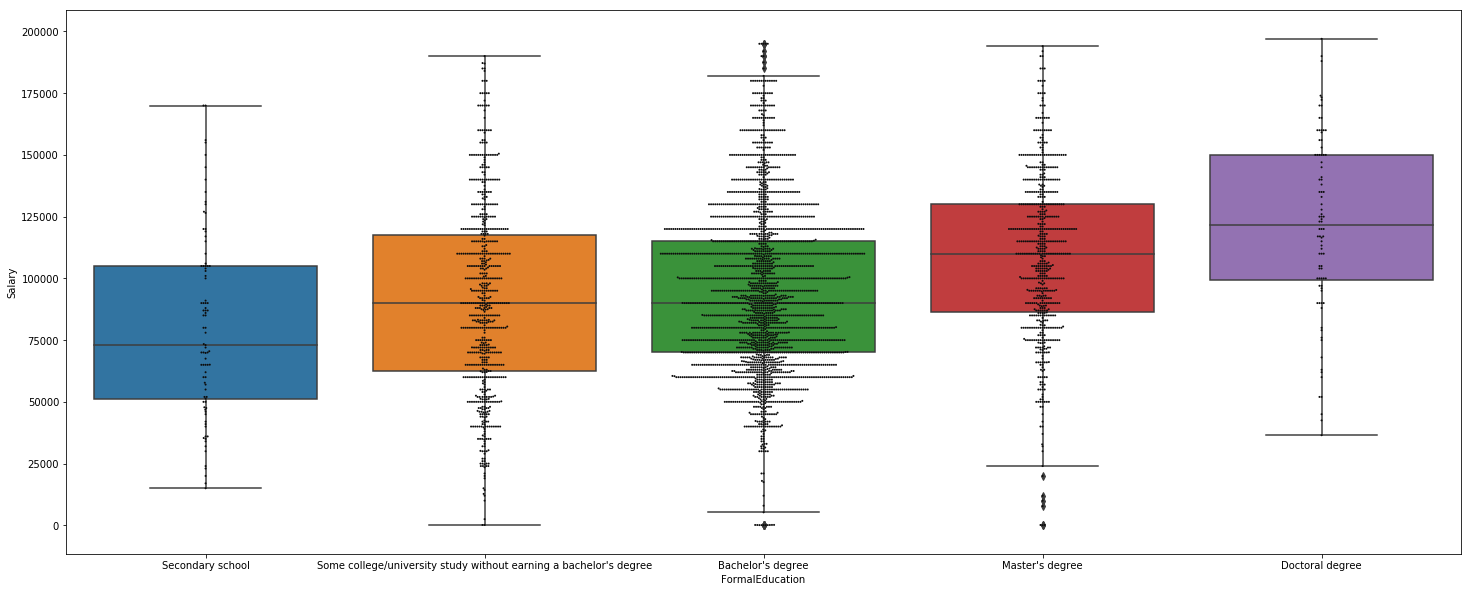

In [7]:
education_list= ["Secondary school","Some college/university study without earning a bachelor's degree",
                 "Bachelor's degree","Master's degree","Doctoral degree"]
plot_variables_of_interest(df_us,"FormalEducation","Salary",education_list,x_dim = 25)

In [8]:
df_us["MajorUndergrad"].value_counts() / len(df_us["MajorUndergrad"]) * 100

Computer science or software engineering                        41.475338
Computer engineering or electrical/electronics engineering       8.240943
A natural science                                                4.600611
Mathematics or statistics                                        4.129201
Computer programming or Web development                          4.103012
A non-computer-focused engineering discipline                    3.980794
A humanities discipline                                          3.483195
Information technology, networking, or system administration     3.264950
Fine arts or performing arts                                     2.741161
A business discipline                                            2.671323
Something else                                                   2.627674
A social science                                                 2.470537
Management information systems                                   2.199913
I never declared a major              

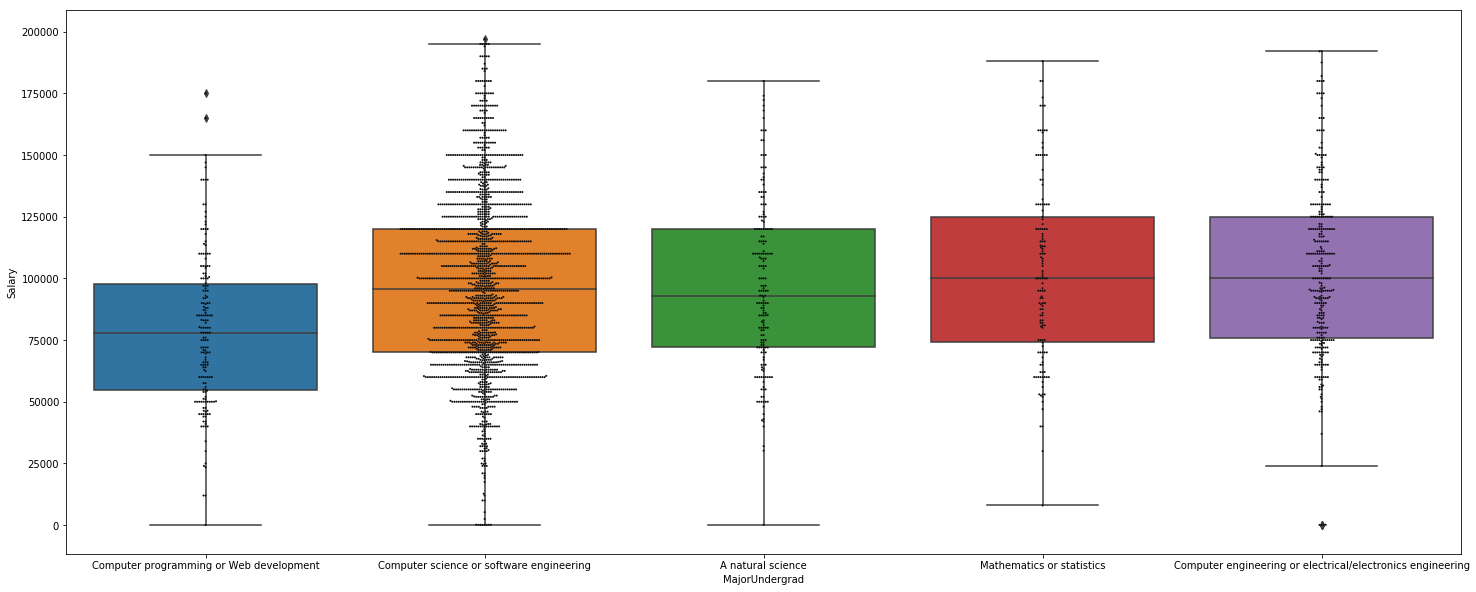

In [9]:
undergrad_major_list= ["Computer programming or Web development","Computer science or software engineering",
 "A natural science","Mathematics or statistics","Computer engineering or electrical/electronics engineering",]
plot_variables_of_interest(df_us,"MajorUndergrad","Salary",undergrad_major_list,x_dim = 25)

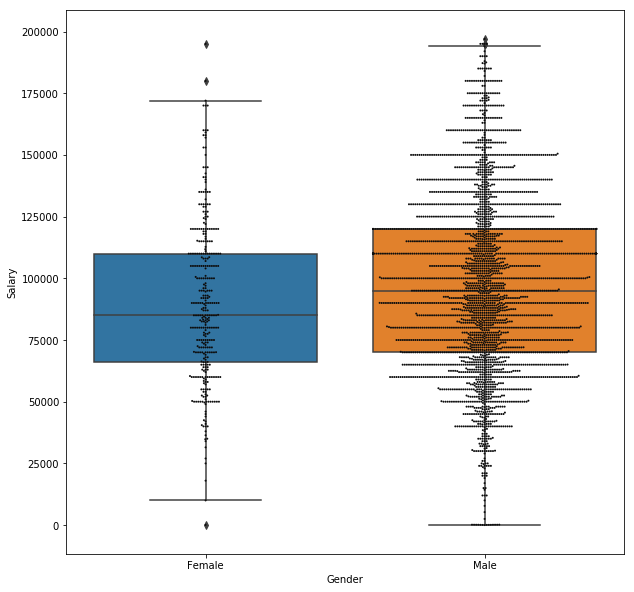

In [10]:
gender_list= ["Female","Male",]
plot_variables_of_interest(df_us,"Gender","Salary",gender_list)

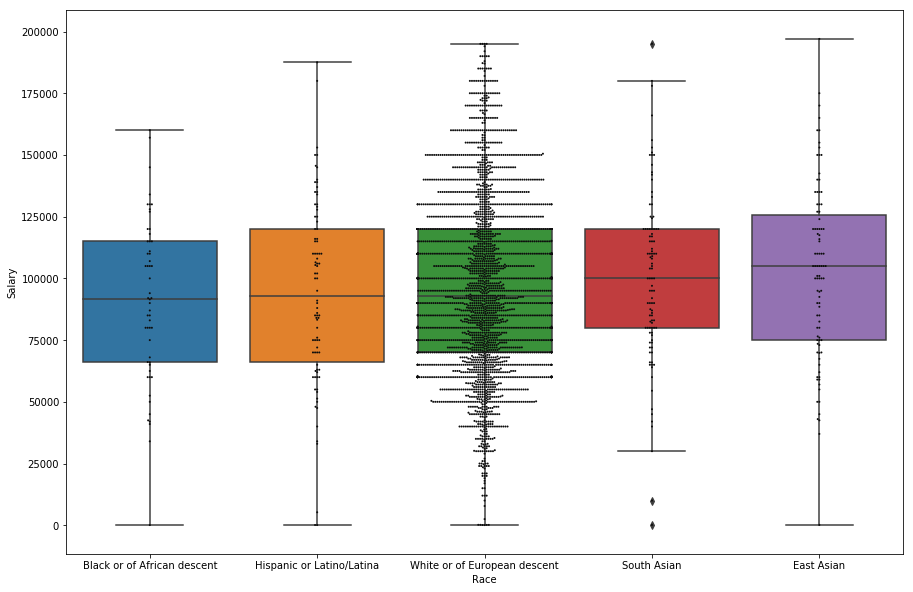

In [11]:
r_list = ["Black or of African descent",'Hispanic or Latino/Latina', 
          "White or of European descent","South Asian", "East Asian"]
plot_variables_of_interest(df_us,"Race","Salary",r_list,x_dim=15)          

In [14]:
df_us["Race"].value_counts()

8.0     2704
7.0     2031
9.0     1698
10.0    1501
6.0      850
5.0      545
4.0      225
3.0      153
2.0       86
0.0       51
1.0       28
Name: CareerSatisfaction, dtype: int64

In [30]:
# Percentage of country choosing to do a PHD:

for country in df_blog["Country"].unique():
    
    df_country = df_blog[df_blog["Country"]==country]
    doc_num = df_country[df_country["FormalEducation"] == "Doctoral degree"].shape[0]
    total_num = df_country.shape[0]
    print(country + ": " + str(doc_num/ total_num*100))
    



United States: 2.8721082496726322
United Kingdom: 4.09556313993174
Switzerland: 6.050420168067227
New Zealand: 4.365079365079365
Poland: 1.4728682170542635
Colombia: 0.0
France: 5.402298850574713
Canada: 1.701746529332736
Germany: 3.7171132029930005
Greece: 4.026845637583892
Brazil: 1.287001287001287
Israel: 0.6956521739130435
Italy: 3.329065300896287
Belgium: 3.9603960396039604
India: 0.346353665576294
Chile: 1.8018018018018018
Croatia: 1.744186046511628
Argentina: 1.9607843137254901
Netherlands: 3.274853801169591
Denmark: 4.666666666666667
Ukraine: 1.4044943820224718
Sri Lanka: 0.0
Malaysia: 1.0416666666666665
Finland: 4.529616724738676
Turkey: 1.6528925619834711
Spain: 2.7777777777777777
Austria: 1.6771488469601679
Mexico: 2.2792022792022792
Russian Federation: 2.405498281786942
Bulgaria: 0.0
Uruguay: 0.0
Estonia: 0.0
Iran: 2.366863905325444
Bangladesh: 1.0869565217391304
Sweden: 4.4189852700491
Lithuania: 0.0
Paraguay: 4.545454545454546
Romania: 1.2477718360071302
Costa Rica: 1.851